### Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joblib

from pathlib import Path
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split


### Importing the databases

To do this, we will create a dictionary with the first 3 characters of the month names and the corresponding number of that month.

For each database file, we will import the file and create a column in the database with the month and year of each piece of information.

In [13]:
#Set an empty DataFrame
month = {'jan': 1, 'fev':2, 'mar':3, 'abr': 4, 'mai':5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

airbnb_df = pd.DataFrame()
#Set datasets path.
path_data = Path('/')
#Iterate all the files in selected path.
for file in path_data.iterdir():
    if '.csv' in file.name:
        df = pd.read_csv(f'/{file.name}')
        df['month'] = month[file.name[:3]]
        df['year'] = int(file.name[-8:-4])
        airbnb_df = airbnb_df.append(df)

display(airbnb_df)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (62,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,month,year
0,17878,https://www.airbnb.com/rooms/17878,20190923212307,2019-09-24,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for Carni...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for Carni...,none,This is the best spot in Rio. Everything happe...,...,strict_14_with_grace_period,f,f,1,1.0,0.0,0.0,2.13,9,2019
1,25026,https://www.airbnb.com/rooms/25026,20190923212307,2019-09-24,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,strict_14_with_grace_period,t,t,3,3.0,0.0,0.0,2.06,9,2019
2,31560,https://www.airbnb.com/rooms/31560,20190923212307,2019-09-24,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,strict_14_with_grace_period,f,f,1,1.0,0.0,0.0,2.36,9,2019
3,35636,https://www.airbnb.com/rooms/35636,20190923212307,2019-09-24,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,strict_14_with_grace_period,t,t,1,1.0,0.0,0.0,2.25,9,2019
4,35764,https://www.airbnb.com/rooms/35764,20190923212307,2019-09-24,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,none,Our guests will experience living with a local...,...,strict_14_with_grace_period,f,t,1,1.0,0.0,0.0,2.83,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34964,37776024,https://www.airbnb.com/rooms/37776024,20190815025239,2019-08-15,Quarto Casal decorado com ar condicionado,Apartamento decorado localizado no excelente c...,"Esse quarto não tem tv, mas há TV na sala de e...",Apartamento decorado localizado no excelente c...,none,O condomínio possui uma Praça grande e agradáv...,...,flexible,f,f,1,0.0,1.0,0.0,NaN,8,2019
34965,37776081,https://www.airbnb.com/rooms/37776081,20190815025239,2019-08-15,Quarto em cantinho aconchegante na Tijuca / RJ,"Predio localizado no final da rua, com guarita...",Aproveite para relaxar nesse cantinho ao lado ...,"Predio localizado no final da rua, com guarita...",none,Bairro próximo à Floresta da Tijuca e com 4 es...,...,flexible,f,f,1,0.0,1.0,0.0,NaN,8,2019
34966,37777313,https://www.airbnb.com/rooms/37777313,20190815025239,2019-08-15,All in Rio: (SM-102),NaN,NaN,Esse FANTÁSTICO ESPAÇO para até 4 pessoas está...,none,NaN,...,super_strict_30,t,f,37,34.0,3.0,0.0,NaN,8,2019
34967,37778108,https://www.airbnb.com/rooms/37778108,20190815025239,2019-08-15,Conjugado com mezanino.,NaN,NaN,NaN,none,NaN,...,flexible,f,f,1,1.0,0.0,0.0,NaN,8,2019


### Handling the data

- Because we have so many columns, our model can end up being very slow.
- Also, a quick analysis lets you see that several columns are not needed for our prediction model, so we are going to exclude some columns from our database.
- Types of columns that we will exclude:
    1. IDs, links, and information not relevant to the model;
    2. Repeated or extremely similar columns (which give the same information to the model. e.g. Date x Year/Month);
    3. Columns in which all or almost all values are the same.
      

 
    
- To do this, we will create an excel file with the first 1,000 records and perform a qualitative analysis, analyzing the columns and identifying which of them are unnecessary.

In [14]:
# airbnb_df.head(1000).to_csv('earliest records.csv')

#### After the qualitative analysis of the columns, taking into account the criteria explained above, we are left with the following columns:

In [15]:
columns = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','month','year']


airbnb_df = airbnb_df.loc[:, columns]
display(airbnb_df)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,month,year
0,within an hour,100%,t,2.0,-22.96592,-43.17896,Condominium,Entire home/apt,5,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict_14_with_grace_period,9,2019
1,within a few hours,100%,f,3.0,-22.97712,-43.19045,Apartment,Entire home/apt,3,1.0,...,10.0,9.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,9,2019
2,within an hour,100%,t,1.0,-22.98302,-43.21427,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,9,2019
3,within a few hours,100%,t,1.0,-22.98816,-43.19359,Apartment,Entire home/apt,3,1.5,...,9.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,9,2019
4,within an hour,100%,t,1.0,-22.98127,-43.19046,Loft,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34964,NaN,NaN,f,0.0,-23.02361,-43.48724,Apartment,Private room,2,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,8,2019
34965,NaN,NaN,f,0.0,-22.92389,-43.21905,Apartment,Private room,2,1.0,...,NaN,NaN,NaN,NaN,NaN,t,f,flexible,8,2019
34966,within an hour,100%,f,64.0,-22.98466,-43.22094,House,Entire home/apt,4,2.0,...,NaN,NaN,NaN,NaN,NaN,t,f,super_strict_30,8,2019
34967,NaN,NaN,f,1.0,-22.93458,-43.19050,Apartment,Entire home/apt,2,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,8,2019


### Handling Missing Values

- Analyzing the data, we can see that there are many empty values. The columns with more than 300,000 NaN values have been eliminated.
- For the other columns, since we still have a lot of data (more than 900,000 rows), we will just discard the NaN data.

In [16]:
for column in airbnb_df:
    if airbnb_df[column].isnull().sum() > 300000:
        airbnb_df = airbnb_df.drop(column, axis=1)


airbnb_df = airbnb_df.dropna()

print(airbnb_df.isnull().sum())
print(airbnb_df.shape)

host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
month                       0
year                        0
dtype: int64
(897709, 23)


### Checking the data types in each column

- We need to do this because sometimes Python reads as text a column that should be a number, so we need to correct it.

In [17]:
print(airbnb_df.dtypes)
print('-' * 55)
print(airbnb_df.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
month                         int64
year                          int64
dtype: object
-------------------------------------------------------
host_is_superhost                                                           t
host_listings_count     

- Since the price and extra people columns are being recognized as objects (instead of as floats) we have to change the variable type of the column.

In [18]:
# column price and extra people --> float
airbnb_df['price'] = airbnb_df['price'].str.replace('$', '')
airbnb_df['price'] = airbnb_df['price'].str.replace(',', '')
airbnb_df['price'] = airbnb_df['price'].astype(np.float32, copy=False)

airbnb_df['extra_people'] = airbnb_df['extra_people'].str.replace('$', '')
airbnb_df['extra_people'] = airbnb_df['extra_people'].str.replace(',', '')
airbnb_df['extra_people'] = airbnb_df['extra_people'].astype(np.float32, copy=False)

print(airbnb_df.dtypes)

<ipython-input-18-527161246cc9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb_df['price'] = airbnb_df['price'].str.replace('$', '')
<ipython-input-18-527161246cc9>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb_df['extra_people'] = airbnb_df['extra_people'].str.replace('$', '')


host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
month                         int64
year                          int64
dtype: object


### Exploratory Analysis and Dealing with Outliers

- We will basically look feature by feature for:
    1. See the correlation between the features and decide if we should keep all the features we have.
    2. Exclude outliers (we will use as a rule values below Q1 - 1.5xAmplitude and values above Q3 + 1.5xAmplitude). Amplitude = Q3 - Q1.
    3. Confirm whether all the characteristics we have really make sense for our model or whether any of them will not help us and we should exclude them.
    
- Let's start with the columns for price (the end result we want) and extra_people (also monetary value). These are the continuous numeric values.

- Next we will look at the discrete numeric value columns (accommodations, rooms, guests_included, etc.).

- Finally, we will evaluate the text columns and define which categories make sense for us to keep or not.

**Be careful**: Don't directly exclude outliers, think about exactly what you are doing. If you don't have a clear reason to remove the outliers, it may not be necessary and may be detrimental to generalization. There has to be a balance. Of course you can always test and see which is the best result, but doing this for all features will be a lot of work and will take a lot of time.

**Analysis example**: If the goal is to help you price a property that you are making available for rent, excluding the outliers in the "host_listings_count" column may make sense. Now, if you have a company with a number of properties and want to compare with other companies in that same business to position yourself better, perhaps excluding outliers with more than 6 properties will hurt your model. Always think about your goal.

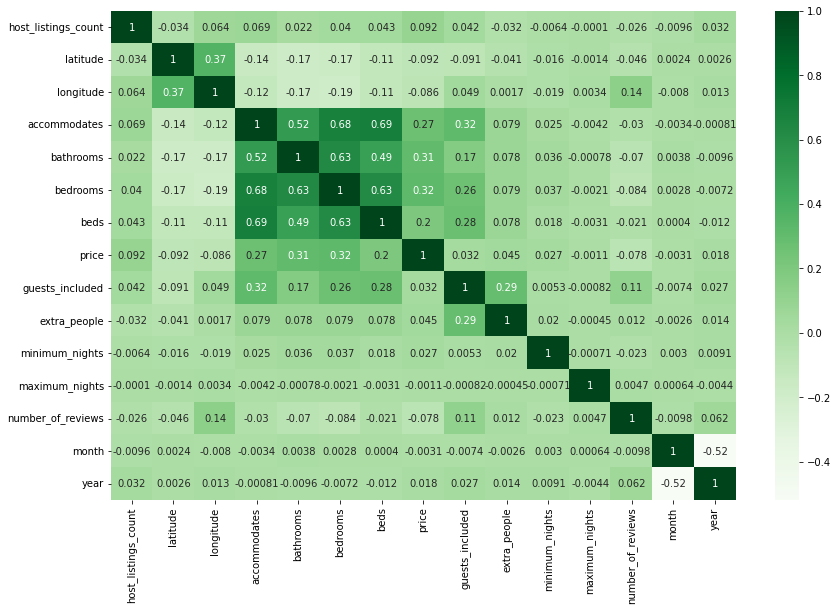

In [19]:
plt.figure(figsize=(14,9))
sns.heatmap(airbnb_df.corr(), annot=True, cmap='Greens')

### Defining Functions for Outlier Analysis

Let's define some functions to help in the outlier analysis of columns.

In [20]:
def limits(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    amplitude = q3 - q1

    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def del_outliers(df, column):
    rows_qtt = df.shape[0]
    bottom_lim, top_lim = limits(df[column])
    df = df.loc[(df[column] >= bottom_lim) & (df[column] <= top_lim), :]

    return df, rows_qtt - df.shape[0]

In [21]:
def box_diagram(column):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=column, ax=ax1)
    ax2.set_xlim(limits(column))
    sns.boxplot(x=column, ax=ax2)

def histogram(column):
    plt.figure(figsize=(15,5))
    sns.histplot(column, kde=True, linewidth=0)

def bar_graph(column):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=column.value_counts().index, y=column.value_counts())
    ax.set_xlim(limits(column))

#### price

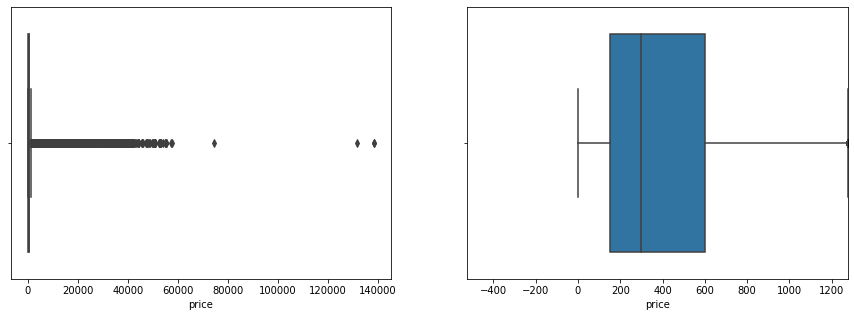

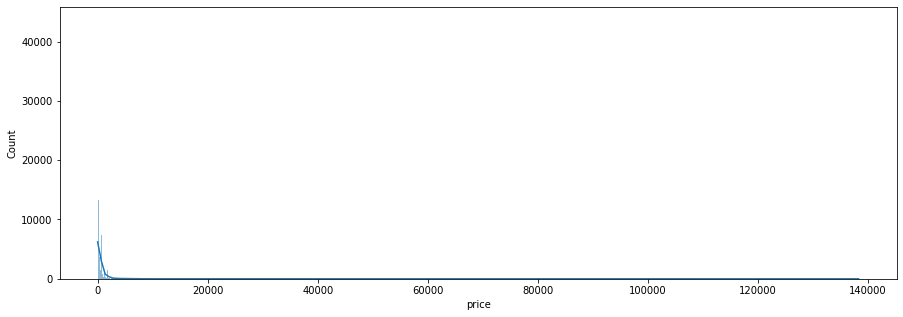

In [22]:
box_diagram(airbnb_df['price'])
histogram(airbnb_df['price'])

Since we are building a model for ordinary properties, I believe that the values above the upper limit (in the box diagram) will only be from very high luxury apartments, which is not our main goal. Therefore, we can exclude these outliers.

In [23]:
airbnb_df, removed_rows = del_outliers(airbnb_df, 'price')
print(f'{removed_rows} Removed rows.')

87282 Removed rows.


(810427, 23)


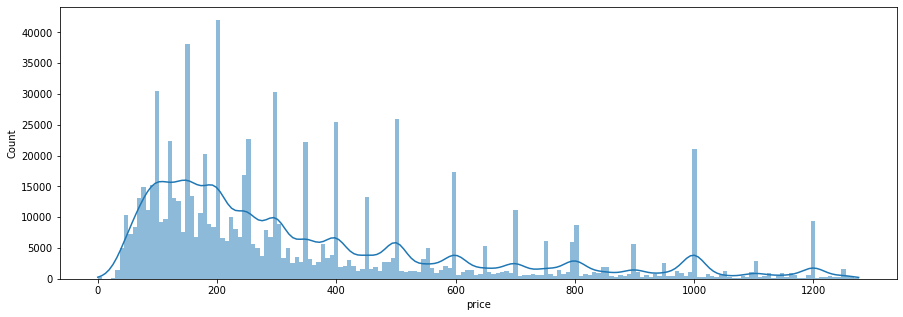

In [24]:
histogram(airbnb_df['price'])
print(airbnb_df.shape)

#### extra_people

5631.0


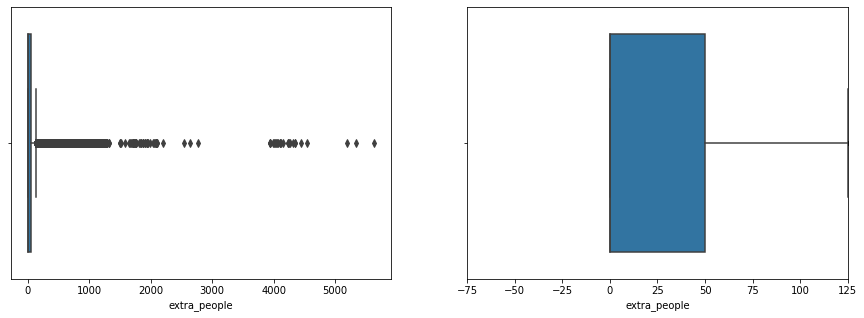

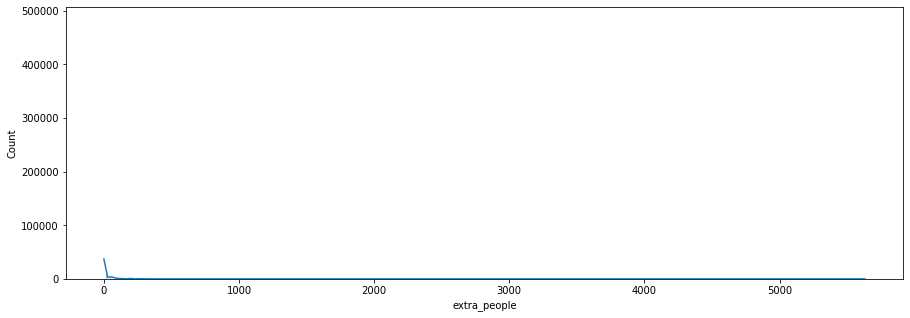

In [25]:
box_diagram(airbnb_df['extra_people'])
histogram(airbnb_df['extra_people'])
print(airbnb_df['extra_people'].max())

In [26]:
airbnb_df, removed_rows = del_outliers(airbnb_df, 'extra_people')
print(f'{removed_rows} Removed rows.')

59194 Removed rows.


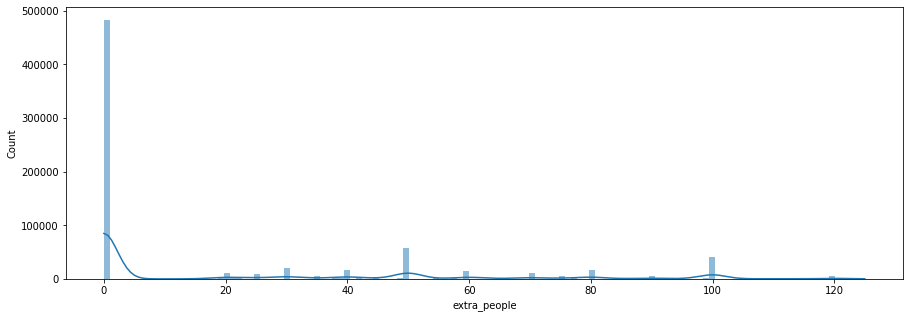

In [27]:
histogram(airbnb_df['extra_people'])


#### host_listings_count

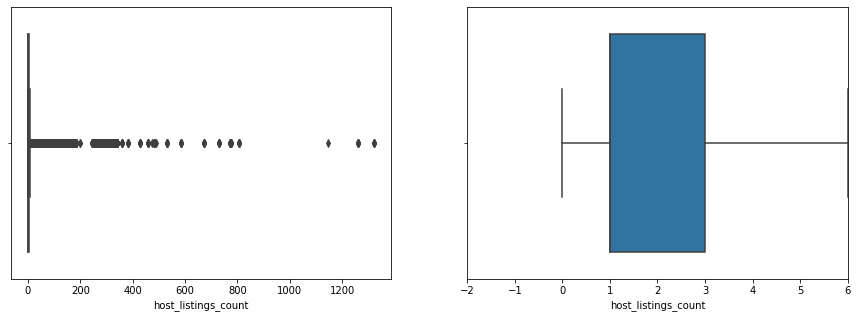

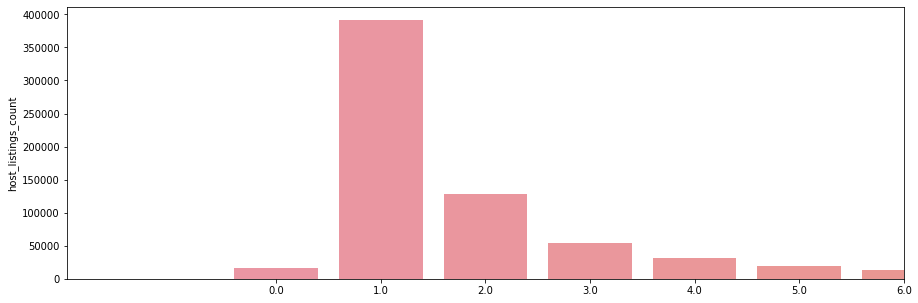

In [28]:
box_diagram(airbnb_df['host_listings_count'])
bar_graph(airbnb_df['host_listings_count'])

In [29]:
airbnb_df, removed_rows = del_outliers(airbnb_df, 'host_listings_count')
print(f'{removed_rows} removed rows')

97723 removed rows


#### Accommodates

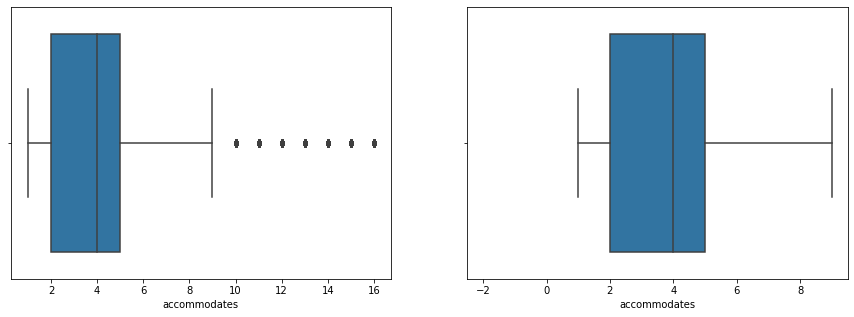

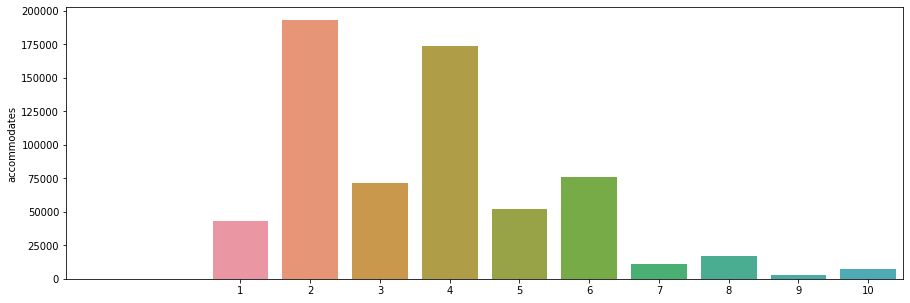

In [30]:
box_diagram(airbnb_df['accommodates'])
bar_graph(airbnb_df['accommodates'])

#### Bathrooms

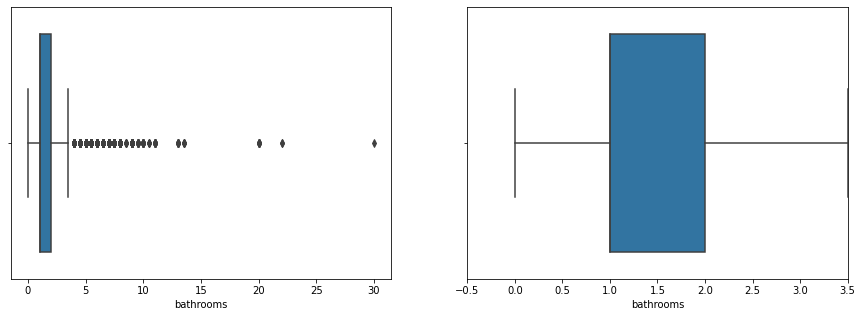

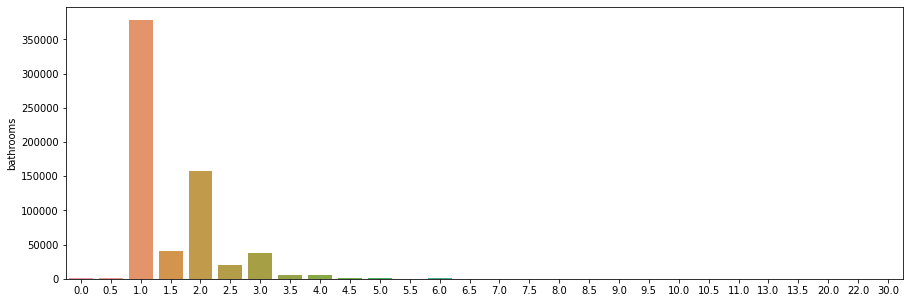

In [31]:
box_diagram(airbnb_df['bathrooms'])
plt.figure(figsize=(15,5))
sns.barplot(x=airbnb_df['bathrooms'].value_counts().index, y=airbnb_df['bathrooms'].value_counts())

#### Bedrooms

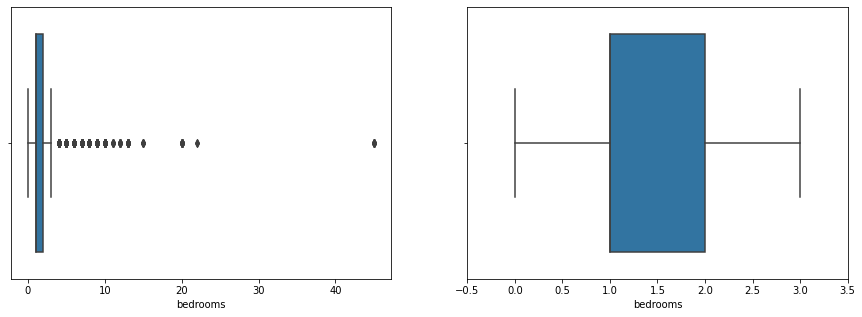

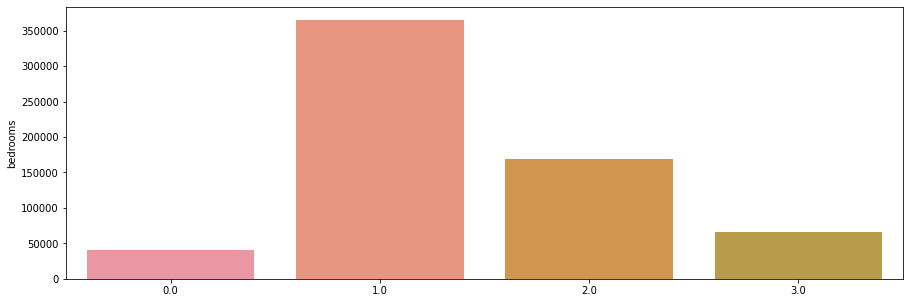

In [32]:
box_diagram(airbnb_df['bedrooms'])
bar_graph(airbnb_df['bedrooms'])

#### Beds

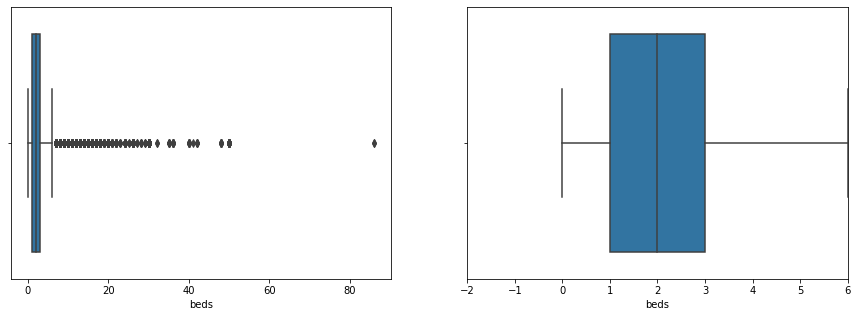

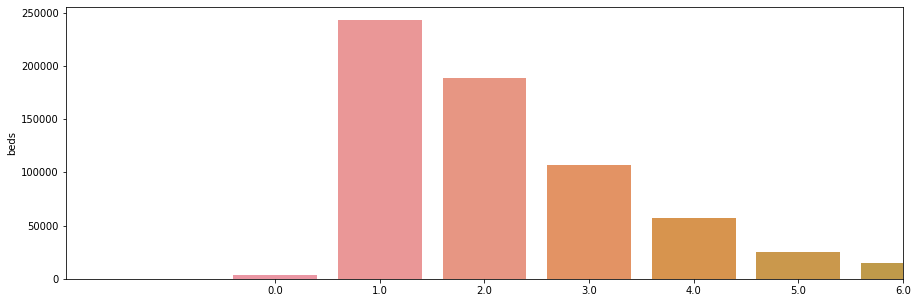

In [33]:
box_diagram(airbnb_df['beds'])
bar_graph(airbnb_df['beds'])

#### guests_included

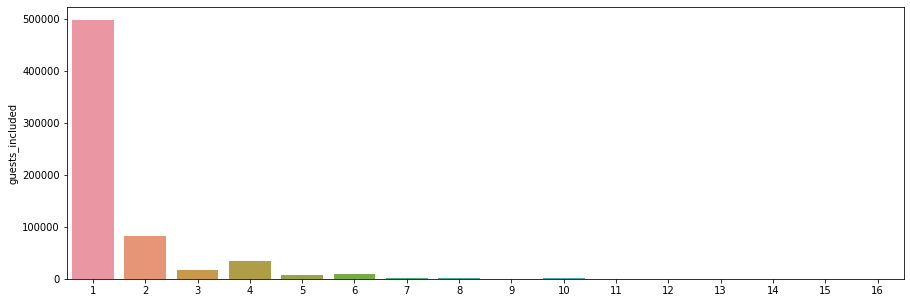

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x=airbnb_df['guests_included'].value_counts().index, y=airbnb_df['guests_included'].value_counts())

Let's remove this feature from the analysis. It seems that airbnb users use the default value of airbnb as 1 guest included a lot. This can lead our model to consider a feature that is actually not essential for pricing, so it seems best to exclude the column from the analysis

In [35]:
airbnb_df = airbnb_df.drop('guests_included', axis=1)
airbnb_df.shape

(653510, 22)

#### minimum_nights

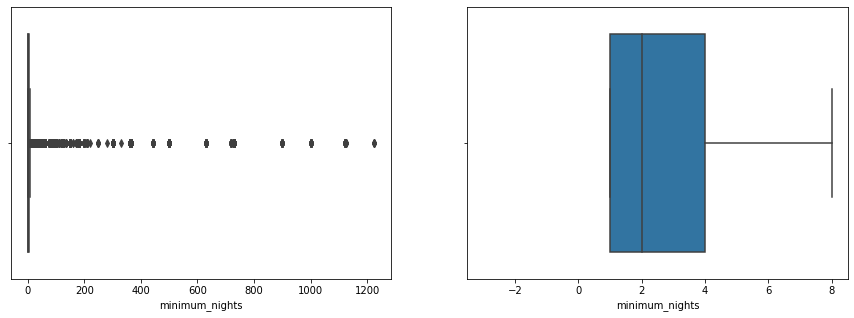

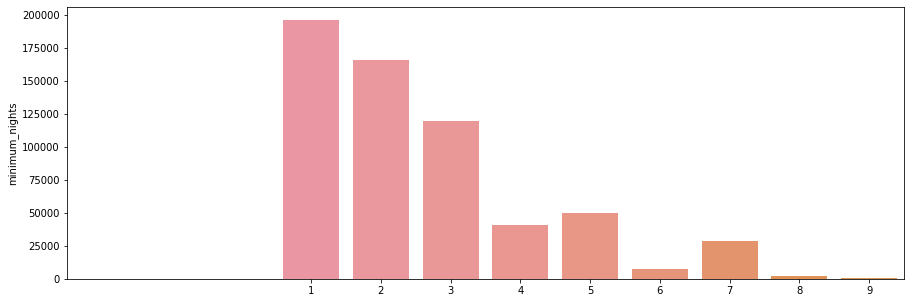

In [36]:
box_diagram(airbnb_df['minimum_nights'])
bar_graph(airbnb_df['minimum_nights'])

- Here we have a perhaps even stronger reason to exclude these properties from the analysis.

- As we are looking for a model that helps to price ordinary properties as an ordinary person would like to have them available for renting. In this case, properties that demand more than 8 nights as the "minimum nights" may be seasonal properties, or even properties for living.

- Therefore we will exclude the outliers from this column.

In [37]:
airbnb_df, removed_rows = del_outliers(airbnb_df, 'minimum_nights')
print(f'{removed_rows} removed rows')

43477 removed rows


#### maximum_nights

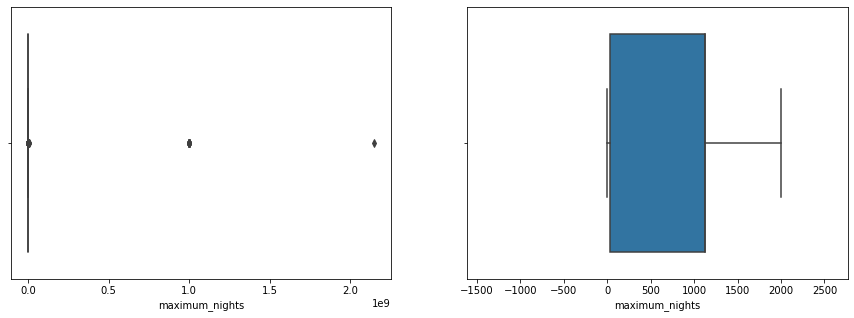

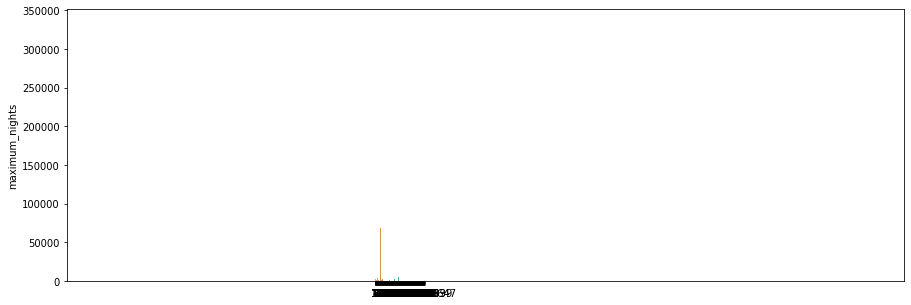

In [38]:
box_diagram(airbnb_df['maximum_nights'])
bar_graph(airbnb_df['maximum_nights'])

- This column doesn't seem to help the analysis.

- This is because it seems that almost all hosts don't fill in this 'maximum nights' field, so it doesn't seem to be a relevant factor.

In [39]:
airbnb_df = airbnb_df.drop('maximum_nights', axis=1)
airbnb_df.shape

(610033, 21)

#### number_of_reviews

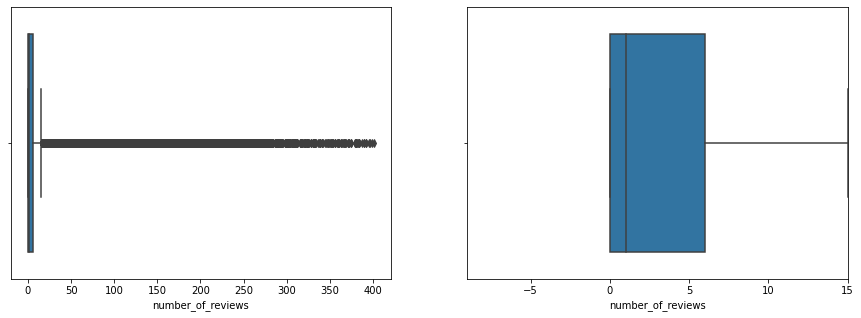

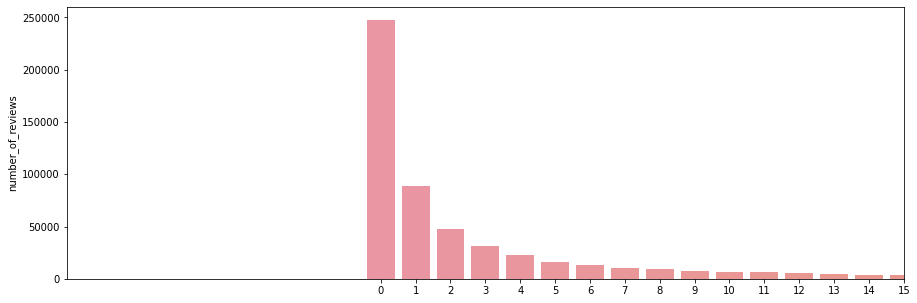

In [40]:
box_diagram(airbnb_df['number_of_reviews'])
bar_graph(airbnb_df['number_of_reviews'])

- Here we could make a few different decisions. I will make a decision based on my personal analysis to take this feature out of the analysis, for a few reasons:

    1. If we exclude the outliers, we will exclude the people who have the highest amount of analysis (which are usually the hosts who have the highest number of rentals). This can have a very negative impact on our model
    2. Thinking about our goal, if I have a property and want to put it up for rent on Airbnb, of course I don't have any reviews. So maybe taking that feature out of the analysis could actually end up helping.
    3. I am particularly doubtful whether or not this feature should affect the final price.

In [41]:
airbnb_df = airbnb_df.drop('number_of_reviews', axis=1)
airbnb_df.shape

(610033, 20)

### Handling of Text Value Columns



#### property_type

Apartment                 474618
House                      58539
Condominium                28025
Serviced apartment         12757
Loft                       12400
Bed and breakfast           4513
Guest suite                 3731
Hostel                      3106
Guesthouse                  2326
Other                       2090
Villa                       1417
Townhouse                   1049
Aparthotel                   741
Earth house                  579
Chalet                       510
Boutique hotel               498
Cottage                      468
Tiny house                   460
Hotel                        415
Casa particular (Cuba)       344
Bungalow                     240
Cabin                        211
Dorm                         194
Nature lodge                 180
Castle                        90
Treehouse                     76
Island                        64
Boat                          55
Tent                          46
Hut                           41
Campsite  

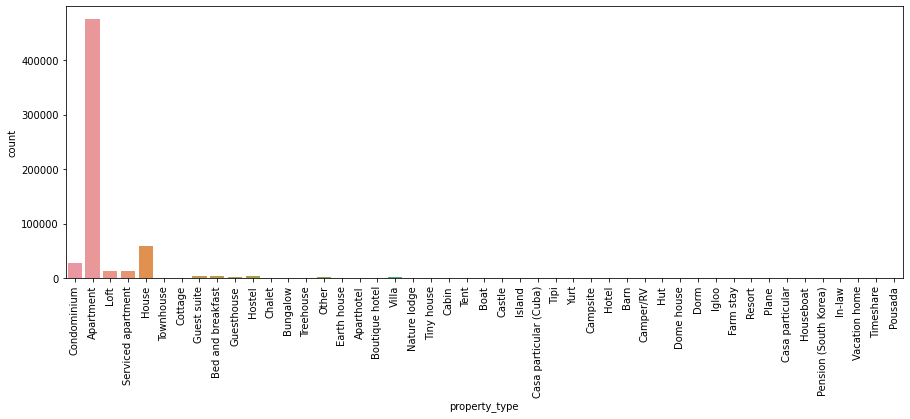

In [42]:
print(airbnb_df['property_type'].value_counts())
plt.figure(figsize=(15, 5))
graph = sns.countplot(x=airbnb_df['property_type'])
graph.tick_params(axis='x', rotation=90)

- Here our action is not to "exclude outliers" but to group values that are too small.

- All property types that have less than 2,000 properties in the database, we will group into a group called "other". We think this will make our model easier.

[]
Apartment             474618
House                  58539
Condominium            28025
Serviced apartment     12757
Loft                   12400
Others                 10018
Bed and breakfast       4513
Guest suite             3731
Hostel                  3106
Guesthouse              2326
Name: property_type, dtype: int64


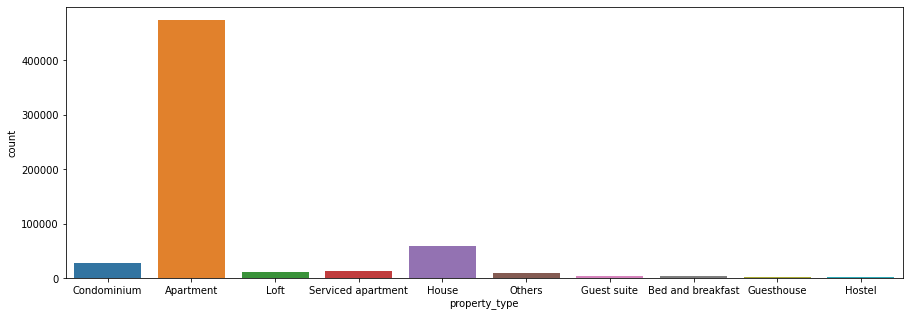

In [45]:
house_types = airbnb_df['property_type'].value_counts()
columns_group = [kind for kind in house_types.index if house_types[kind] < 2100]
print(columns_group)

for kind in columns_group:
    airbnb_df.loc[airbnb_df['property_type']==kind, 'property_type'] = 'Others'


print(airbnb_df['property_type'].value_counts())

plt.figure(figsize=(15, 5))
graph = sns.countplot(x=airbnb_df['property_type'])

#### room_type

Entire home/apt    395110
Private room       199871
Shared room         14028
Hotel room           1024
Name: room_type, dtype: int64


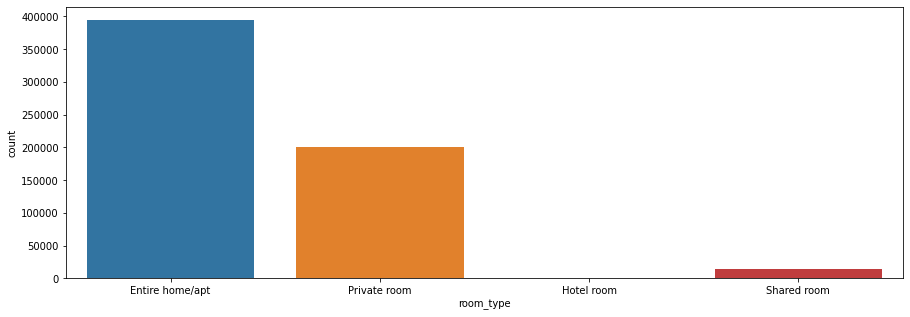

In [44]:
print(airbnb_df['room_type'].value_counts())

plt.figure(figsize=(15, 5))
graph = sns.countplot(x=airbnb_df['room_type'])

In type of room, we don't need to do anything, it already seems to be well distributed.

#### bed_type

Real Bed         598453
Pull-out Sofa      8078
Futon              1725
Airbed             1260
Couch               517
Name: bed_type, dtype: int64
['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
Real Bed    598453
Others       11580
Name: bed_type, dtype: int64


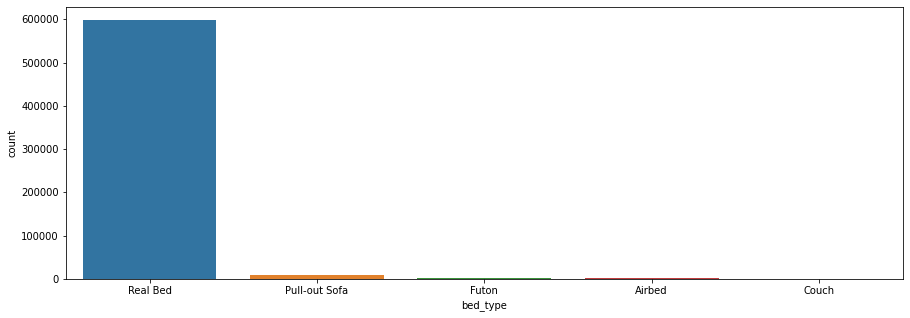

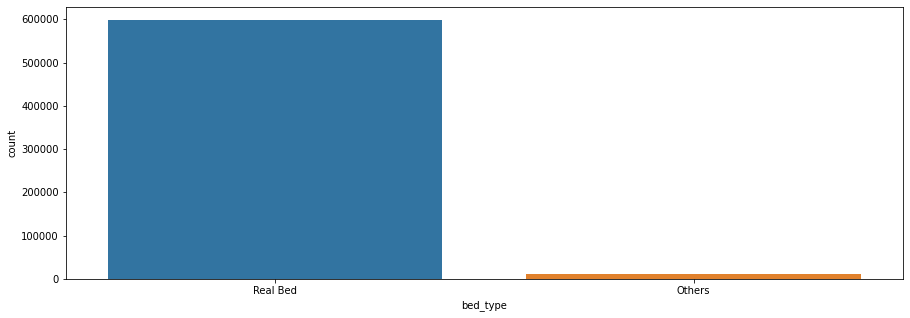

In [46]:
print(airbnb_df['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
graph = sns.countplot(x=airbnb_df['bed_type'])

bed_type = airbnb_df['bed_type'].value_counts()
columns_group = [kind for kind in bed_type.index if bed_type[kind] < 10000]
print(columns_group)

for kind in columns_group:
    airbnb_df.loc[airbnb_df['bed_type']==kind, 'bed_type'] = 'Others'


print(airbnb_df['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
graph = sns.countplot(x=airbnb_df['bed_type'])

- Since we have 1 value that is clearly MUCH larger than all the others, I will create only 2 groups of beds: "Real Bed" and "others".

- This will simplify the model.

#### cancellation_policy 

flexible                       269513
strict_14_with_grace_period    212718
moderate                       117313
strict                          10309
super_strict_60                   135
super_strict_30                    45
Name: cancellation_policy, dtype: int64
['strict', 'super_strict_60', 'super_strict_30']
flexible                       269513
strict_14_with_grace_period    212718
moderate                       117313
strict                          10489
Name: cancellation_policy, dtype: int64


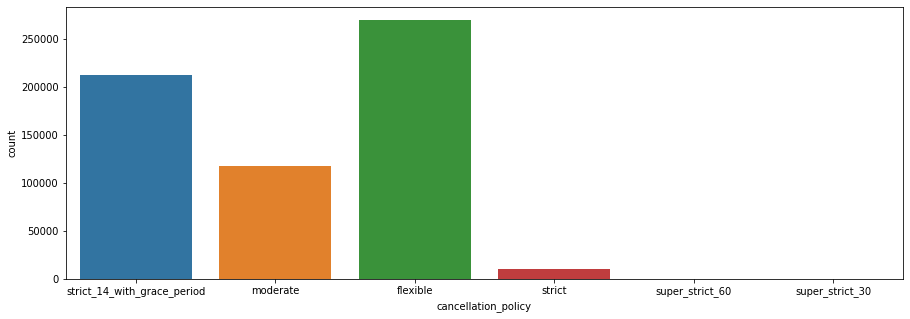

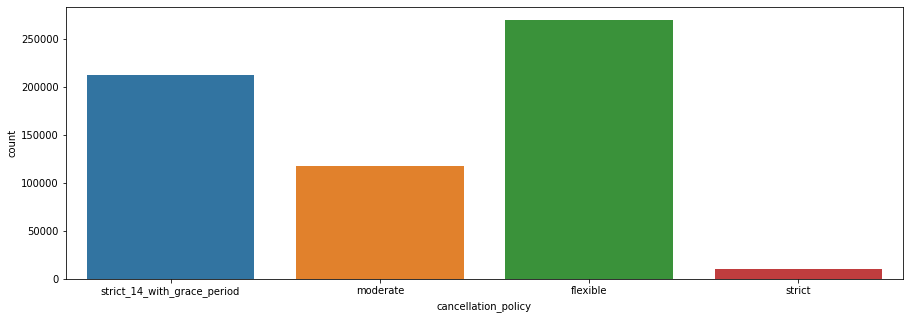

In [47]:
print(airbnb_df['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
graph = sns.countplot(x=airbnb_df['cancellation_policy'])

cancellation_policy = airbnb_df['cancellation_policy'].value_counts()
columns_group = [kind for kind in cancellation_policy.index if cancellation_policy[kind] < 10400]
print(columns_group)

for kind in columns_group:
    airbnb_df.loc[airbnb_df['cancellation_policy']==kind, 'cancellation_policy'] = 'strict'


print(airbnb_df['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
graph = sns.countplot(x=airbnb_df['cancellation_policy'])

#### amenities 


Since we have a very large diversity of amenities, and sometimes the same amenities can be written differently, we will evaluate the quantity of them as the parameter for our model.

In [48]:
print(airbnb_df['amenities'].iloc[1].split(','))
print(len(airbnb_df['amenities'].iloc[1].split(',')))

airbnb_df['n_amenities'] = airbnb_df['amenities'].str.split(',').apply(len)

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', 'Doorman', 'Elevator', '"Buzzer/wireless intercom"', '"Family/kid friendly"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"}']
14


In [49]:
airbnb_df = airbnb_df.drop('amenities', axis=1)
airbnb_df.shape

(610033, 20)

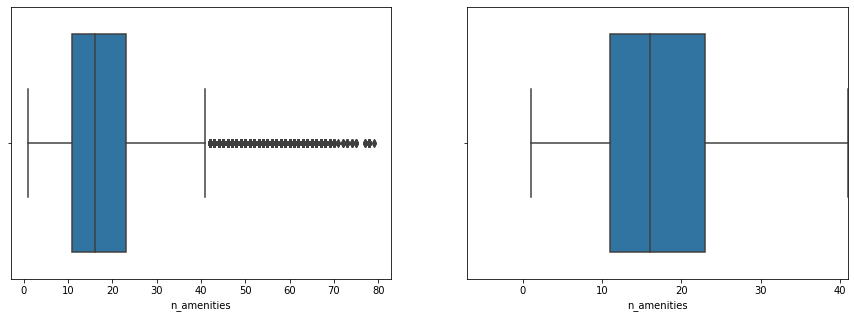

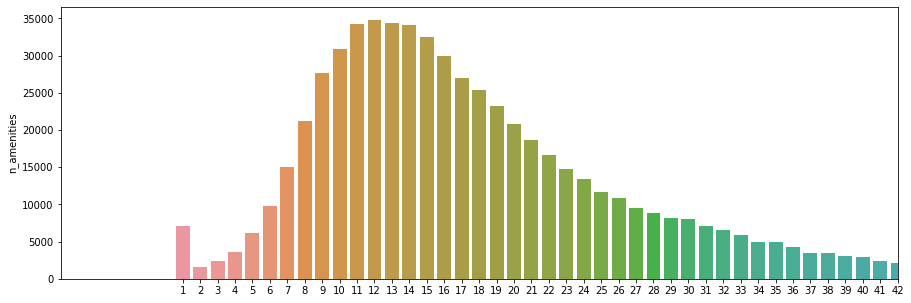

In [50]:
box_diagram(airbnb_df['n_amenities'])
bar_graph(airbnb_df['n_amenities'])

So this text column became a column of numerical values and, like all the others, we excluded the outliers in the same way as before.

In [51]:
airbnb_df, removed_rows = del_outliers(airbnb_df, 'n_amenities')
print(f'{removed_rows} removed rows')


18148 removed rows


### Property map view


We will create a map that displays a sample of our random database (50,000 properties) to see how the properties are distributed across the city and also identify the highest priced locations. 

In [53]:
samples = airbnb_df.sample(n=50000)
map_center = {'lat':samples.latitude.mean(), 'lon':samples.longitude.mean()}
map = px.density_mapbox(samples, lat='latitude', lon='longitude',z='price', radius=2.5,
                        center=map_center, zoom=10,
                        mapbox_style='stamen-terrain')
map.show()

### Encoding

We need to adjust the features to make it easier to run our model (category features, true and false, etc.).

- For true or false value features we will replace True with 1 and False with 0.
- For category features (features in which the column values are text) we will use the dummies variable encoding method.

In [54]:
true_false_columns = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
encoded_df = airbnb_df.copy()

for column in true_false_columns:
  encoded_df.loc[encoded_df[column]=='t', column] = 1
  encoded_df.loc[encoded_df[column]=='f', column] = 0

print(encoded_df.iloc[0])

host_is_superhost                                     1
host_listings_count                                 2.0
latitude                                      -22.96592
longitude                                     -43.17896
property_type                               Condominium
room_type                               Entire home/apt
accommodates                                          5
bathrooms                                           1.0
bedrooms                                            2.0
beds                                                2.0
bed_type                                       Real Bed
price                                             329.0
extra_people                                       62.0
minimum_nights                                        4
instant_bookable                                      1
is_business_travel_ready                              0
cancellation_policy         strict_14_with_grace_period
month                                           

In [55]:
categories_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
encoded_df = pd.get_dummies(data=encoded_df, columns=categories_columns)
display(encoded_df.head())

,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,extra_people,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Others,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period
0,1,2.0,-22.96592,-43.17896,5,1.0,2.0,2.0,329.0,62.0,...,1,0,0,0,0,1,0,0,0,1
1,0,3.0,-22.97712,-43.19045,3,1.0,1.0,2.0,158.0,45.0,...,1,0,0,0,0,1,0,0,0,1
2,1,1.0,-22.98302,-43.21427,3,1.0,1.0,2.0,270.0,42.0,...,1,0,0,0,0,1,0,0,0,1
3,1,1.0,-22.98816,-43.19359,3,1.5,1.0,2.0,374.0,62.0,...,1,0,0,0,0,1,0,0,0,1
4,1,1.0,-22.98127,-43.19046,2,1.0,1.0,1.0,129.0,80.0,...,1,0,0,0,0,1,0,0,0,1


### Prediction Model

- Evaluation Metrics

We’re going to use here the R-squared (R²) that will tell us how well our model can explain the price. This will be a great parameter to see how good our model is.
<br>
-> The closer to 100%, the better
<br>
<br>
We’re also going to calculate the Root Mean Square Error (RMSE), which will show us how much our model is getting it wrong. 
<br>
-> The smaller the error, the better.

In [56]:
def evaluate_model(model_name, y_test, forecast):
    r2 = r2_score(y_test, forecast)
    RMSE = np.sqrt(mean_squared_error(y_test, forecast))

    return f'{model_name} model:\nR²: {r2:.2%}\nRMSE: {RMSE:.2f}'

- Choosing the Models to be Tested

    1. RandomForest
    2. LinearRegression
    3. Extra Tree
    
These are some of the models that exist for predicting numerical values (and are called regression models). We want to calculate the price, so they are the ones we need.

There are dozens or even hundreds of different models. As we learn more and more about data science, we will learn new models and slowly understand which is the best model to use in each situation.

In [57]:
model_rf = RandomForestRegressor()
model_lr = LinearRegression()
model_et = ExtraTreesRegressor()

models = {'RandomForest': model_rf,
          'LinearRegression': model_lr,
          'ExtraTrees': model_et,
          }

y = encoded_df['price']
X = encoded_df.drop('price', axis=1)

### Setting apart the data into: training data and testing data + Model Training

This step is crucial. Artificial Intelligences learn with what we call training data.

Basically what we do is: we’re going to use 10% of the database for testing and 90% for training.

Then, we give the model the training data, it will look at that data and learn how to predict prices.

After it learns, we test it with the test data to see if it is good or not. By analyzing the test data result we find the best model.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for model_name, model in models.items():
    #training
    model.fit(X_train, y_train)
    #testing
    prediction = model.predict(X_test)
    print(evaluate_model(model_name, y_test, prediction))

RandomForest model:
R²: 97.23%
RMSE: 45.11
LinearRegression model:
R²: 33.49%
RMSE: 221.16
ExtraTrees model:
R²: 97.50%
RMSE: 42.86


- Model Chosen as Best Model: Extra Trees Regressor

    This was the model with the highest R² value and at the same time the lowest RMSE value. Since we did not have a big difference in training speed and prediction speed of this model with the Random Forest model (which had close R² and RMSE results), we will choose the ExtraTrees Model.

    The Linear Regression model did not obtain a satisfactory result, its R² and RSME values were much worse than the other 2 models.

- Results of the Evaluation Metrics in the Winning Model:<br>
ExtraTrees model:<br>
R²: 97.50%<br>
RMSE: 42.86

### Adjustments and improvements for the best model

,0
room_type_Entire home/apt,0.102135
latitude,0.097348
longitude,0.097182
accommodates,0.087850
extra_people,0.087696
bathrooms,0.085436
n_amenities,0.082310
bedrooms,0.070365
minimum_nights,0.063098
beds,0.053137


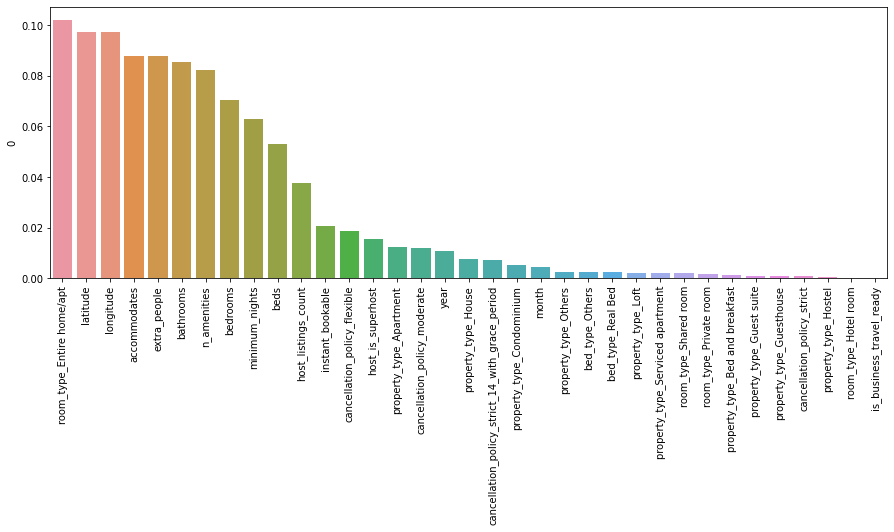

In [59]:
features_importance = pd.DataFrame(model_et.feature_importances_, X_train.columns)
features_importance = features_importance.sort_values(by=0, ascending=False)
display(features_importance)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=features_importance.index, y=features_importance[0])
ax.tick_params(axis='x', rotation=90)

### Final Adjustments to the Model

- is_business_travel_ready column doesn't seem to have much impact on our model. So, to get to a simpler model, let's exclude this feature and test the model without it.

In [60]:
encoded_df = encoded_df.drop('is_business_travel_ready', axis=1)

y = encoded_df['price']
X = encoded_df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

model_et.fit(X_train, y_train)
prediction = model_et.predict(X_test)
print(evaluate_model('ExtraTrees', y_test, prediction))

ExtraTrees model:
R²: 97.50%
RMSE: 42.85


In [61]:
test_df = encoded_df.copy()
for column in test_df:
    if 'bed_type' in column:
        test_df = test_df.drop(column, axis=1)

y = test_df['price']
X = test_df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

model_et.fit(X_train, y_train)
prediction = model_et.predict(X_test)
print(evaluate_model('ExtraTrees', y_test, prediction))

ExtraTrees model:
R²: 97.48%
RMSE: 43.04


In [62]:
print(test_df.columns)

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'extra_people', 'minimum_nights', 'instant_bookable', 'month', 'year',
       'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Others', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object')


# Deploy of the project

- Step 1 -> Create Model file (joblib)
- Step 2 -> Choose the deploy mode:
    - Executable file + Tkinter
    - Deploy to microwebsite (Flask)
    - Deploy only to Streamlit direct use
- Step 3 -> Another Python file (can be Jupyter or PyCharm)
- Step 4 -> Import streamlit and create code
- Step 5 -> Assign the button to load model
- Step 6 -> Deploy done

In [ ]:
X['price'] = y
X.to_csv('data.csv')

In [ ]:
joblib.dump(model_et, 'model.joblib')